<a href="https://colab.research.google.com/github/gsilver321/kmc/blob/main/assignment_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 4.68 MiB | 12.64 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [45]:
df = pd.read_csv('kmc/data/airbnb_hw.csv')
df = df.loc[:, ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']]

print("Pre-Clean NA Count:")
for c in df.columns:
  print(c, sum(df[c].isnull()))

# df['Price'].value_counts() <- is of type str
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Beds'] = df['Beds'].fillna(1) # replace na with 1 bed

# df['Number Of Reviews'].value_counts() <- looks clean

df = df.dropna() # remove remaining na's

print("\nPost-Clean NA Count:")
for c in df.columns:
  print(c, sum(df[c].isnull()))

df.describe()

Pre-Clean NA Count:
Price 0
Beds 85
Number Of Reviews 0
Review Scores Rating 8323

Post-Clean NA Count:
Price 0
Beds 0
Number Of Reviews 0
Review Scores Rating 0


,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [37]:
def maxmin(x):
    return (x - min(x)) / (max(x) - min(x))

df2 = df.drop('Price', axis=1)
df2 = df2.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [42]:
mdl = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0).fit(df2)
df2['cluster'] = mdl.labels_

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

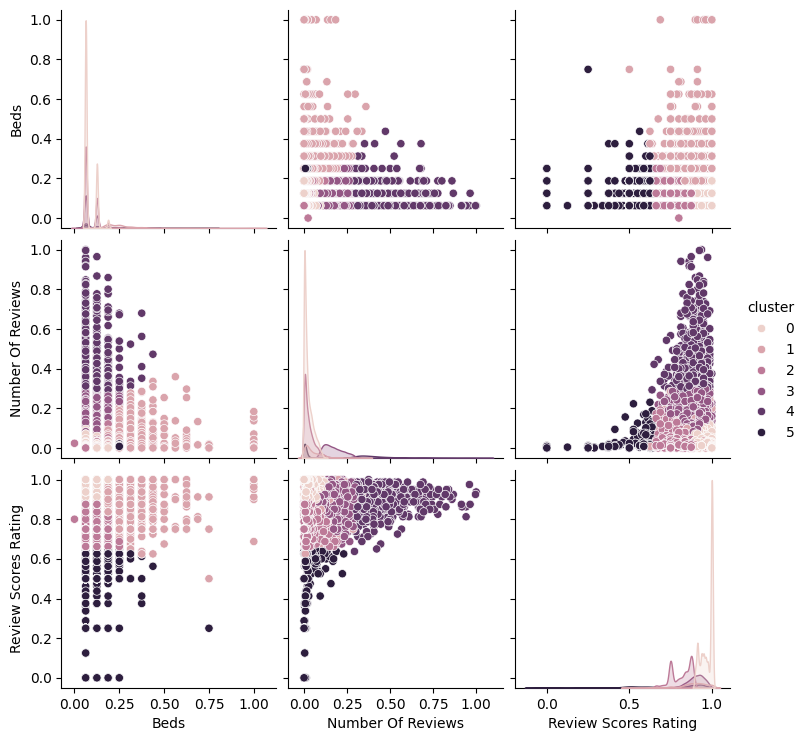

In [43]:
sns.pairplot(data=df2, hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [44]:
df['cluster'] = mdl.labels_
df.loc[:, ['Price', 'cluster']].groupby('cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
1         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0
4          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
5          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0

The cluster with the highest rental price is cluster 1. At an average price of ~293, it is much more expensive than clusters 2, 4, and 5 which are all about $132. Clusters 0 and 3 are sligthly more expensive than 2, 4, and 5 but still much less than cluster 1.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

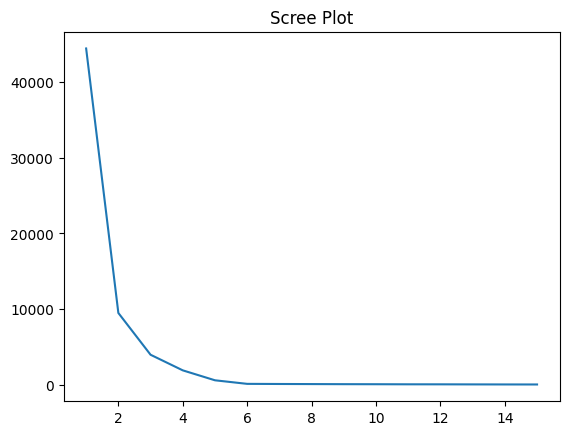

In [46]:
k_bar = 15
SSE = np.zeros(k_bar)

for k in range(k_bar):
    mdl = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(df2)
    SSE[k] = mdl.inertia_

sns.lineplot(x=np.arange(1, k_bar+1) , y=SSE).set_title('Scree Plot')

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        10512.0  152.233352  147.281729  10.0  85.0  130.0  190.0  10000.0
1         7187.0  168.296925  168.483146  20.0  82.0  130.0  199.0   5000.0
2         4456.0  139.024461  112.402556  22.0  80.0  120.0  175.0   5000.0

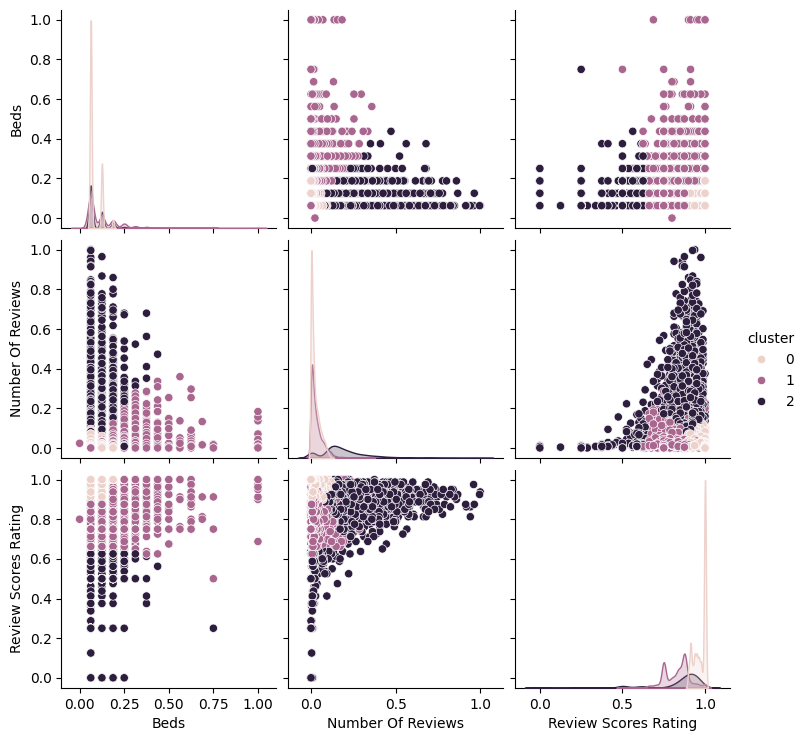

In [48]:
mdl = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0).fit(df2)
df2['cluster'] = mdl.labels_

sns.pairplot(data=df2, hue='cluster')

df['cluster'] = mdl.labels_
df.loc[:, ['Price','cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

In [49]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<ipython-input-68-9be79f4fe740>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 1, count)


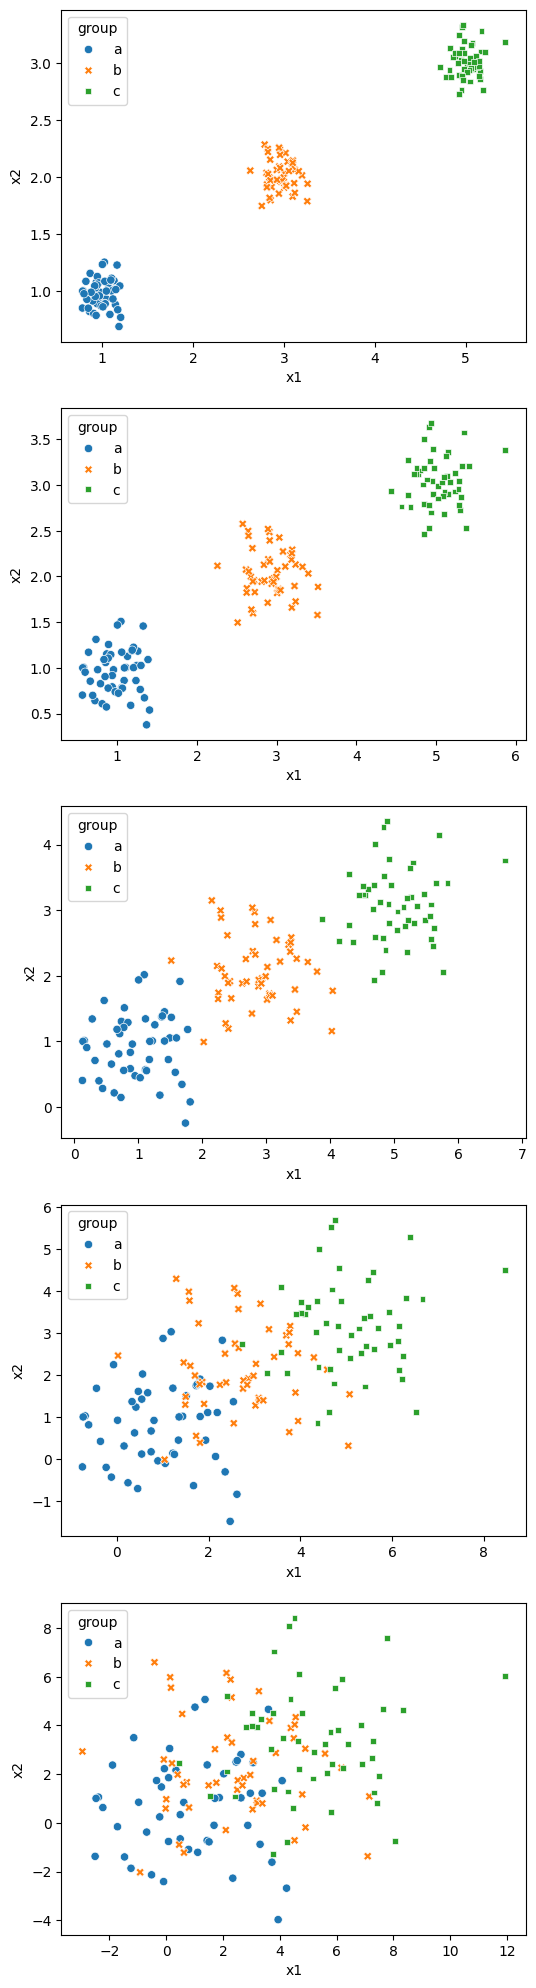

In [68]:
count = 1
plt.subplots(figsize=(6, 25))

for d in [df0_125, df0_25, df0_5, df1_0, df2_0]:
  plt.subplot(5, 1, count)
  sns.scatterplot(data=d, x='x1', y='x2', hue='group', style='group')
  count += 1

As the noise increases, the visual distinctness of the clusters decreases. When noise is 0.125, we can see three very distinct clusters. Conversely, when noise is 2, the groupings vary significantly without much distinctness.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

<ipython-input-78-adbf1531dc71>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 1, count)


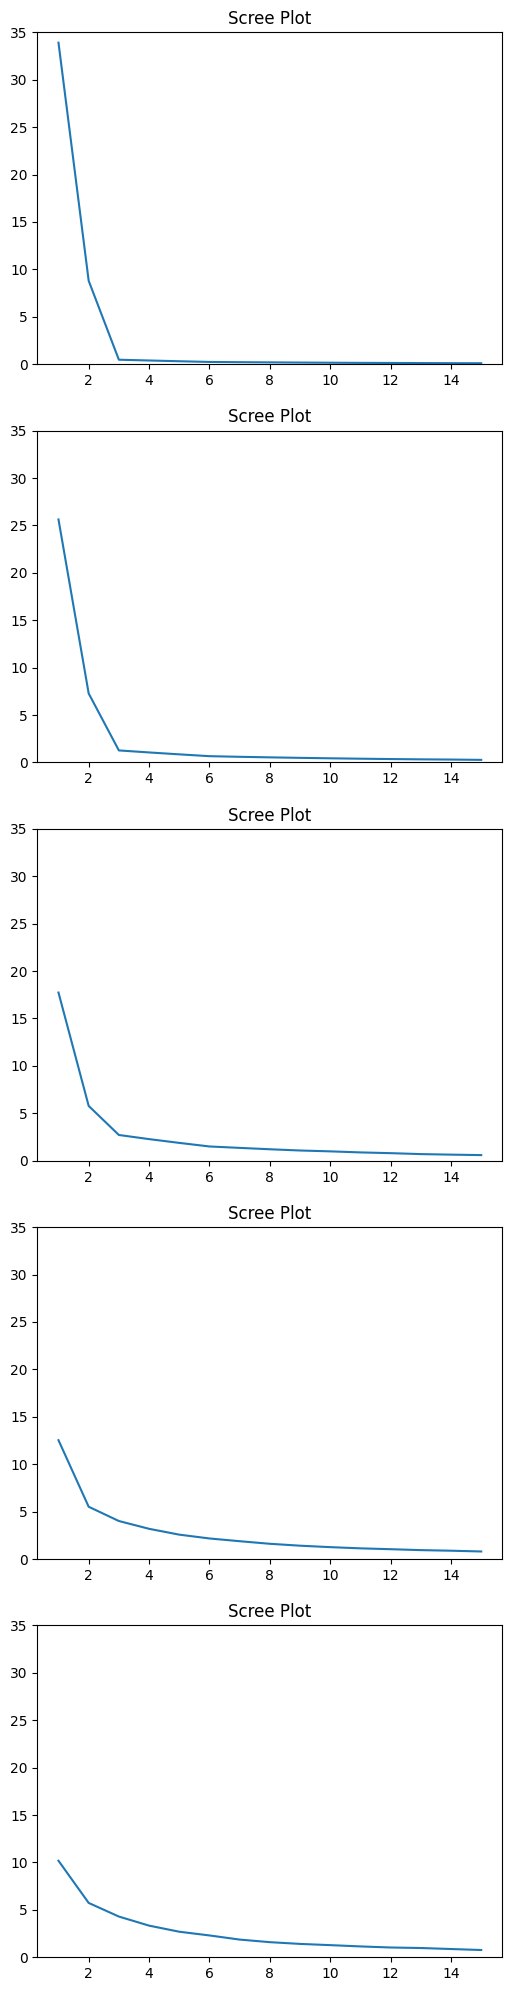

In [78]:
count = 1
plt.subplots(figsize=(6, 25))

for d in [df0_125, df0_25, df0_5, df1_0, df2_0]:
  ax = plt.subplot(5, 1, count)

  X = d.loc[ : , ['x1','x2'] ]
  X = X.apply(maxmin)

  k_bar = 15
  SSE = np.zeros(k_bar)

  for k in range(k_bar):
      mdl = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(X)
      SSE[k] = mdl.inertia_

  sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot')
  ax.set_ylim(0, 35)

  count += 1

As the noise increases, the ability to see the "elbow" decreases. When the portion of the graph to the left of the elbow becomes shorter with increases in noise, it becomes harder to select a k value because it's not entirely obvious where the elbow is actually starting or if there is one.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow can be explained by how additional groupings affect the SSE. In the cases with less noise, we see bigger drops in SSE because up to a certain point, increasing the number of groups makes it really easy to see separate clusters. Conversely, in the cases with high noise, the data is already very scattered and adding more groups won't help the data become much more distinct. More simply, the distinctness of the elbow depends on how separated and distinct the clusters are.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?